In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes
from tika import parser
path = '/home/hank/Work/Text.pdf'

### This works but misses a ton of locations

In [3]:
#The below line will do the same but with text files
#doc = open("/home/hank/Work/plotting-named-entities-in-python/text.txt",encoding="utf8").read()
#Comment out everything below this and uncomment out the link above to do the same but with text files
parsed = parser.from_file(path)

try:
    doctext = parsed["content"].strip().replace("\r","").replace("\n","")

except:
    print("Document has no text")
    doctext = ''

### The below code works better but not nearly as good as the txt one

In [5]:
parsed = parser.from_file(path)#Change the path you your own, pdf is included into the repo
try:
    doctext = parsed["content"]
    docmeta = parsed["metadata"]

except Exception as E:
    print(E, "Document has no text")
    doctext = ''


In [6]:
#print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')
#places = GeoText(doc) #Uncomment out if you want to do a text file
places = GeoText(doctext)# Comment out if you are working with text files or you'll get an error
cities = list(places.cities)
#cities

geolocator = Nominatim(timeout=2)

lat_lon = []
for city in cities: 
    try:
        location = geolocator.geocode(city)
        if location:
            #print(location.latitude, location.longitude)
            lat_lon.append(location)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s"%
             (city, e))
#lat_lon

df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7) 

/home/hank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  import sys


,City Name,Coordinates
0,"London, Greater London, England, SW1A 2DX, Uni...","(51.5073219, -0.1276474)"
1,"Los Angeles, Los Angeles County, California, U...","(34.0536909, -118.2427666)"
2,"Chicago, Cook County, Illinois, United States ...","(41.8755616, -87.6244212)"
3,"Atlanta, Fulton County, Georgia, United States...","(33.7490987, -84.3901849)"
4,"Washington, District of Columbia, 20500, Unite...","(38.8949855, -77.0365708)"
5,"Berlin, Deutschland","(52.5170365, 13.3888599)"
6,"University College, Kybald Street, Grandpont, ...","(51.7520849, -1.251664602208881)"


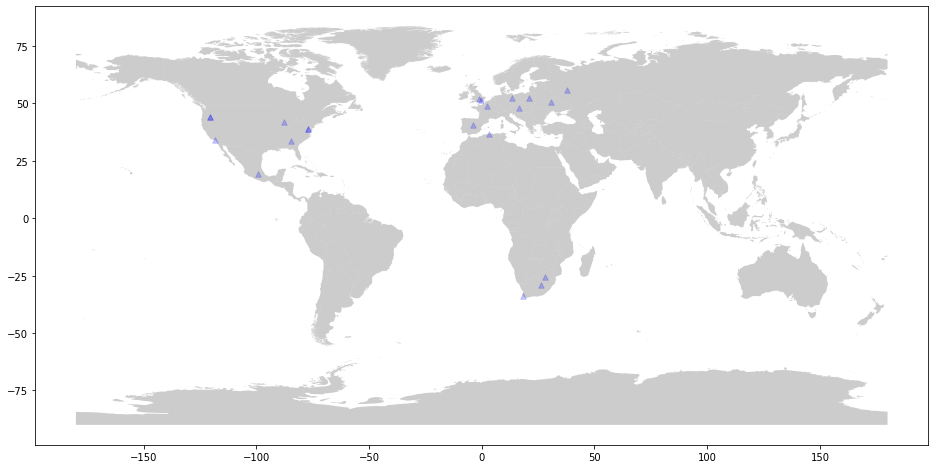

In [8]:
path2 = "/home/hank/Work/plotting-named-entities-in-python/GeoSpatial Data"
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

## coordinate system I'm using
crs = {'init': 'epsg:4326'}

## convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

## world map .shp file I downloaded
countries_map =gpd.read_file(path2)

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, 
                        color = 'b', marker = '^', alpha=.2)